ch5. 6~8 pg. 319~341

## 06 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷

### 규제 선형 모델의 개요

- 최적 모델을 위한 Cost함수 구성요소 = 학습데이터 잔차 오류 최소화+회귀 계수 크기 제어

- 비용 함수 목표 = Min(Rss(W) + alpha*llWll2_2)
  
 alpha: 학습 데이터 적합 정도와 회귀 계수 값의 크기 제어를 수행하는 튜닝 파라미터

- alpha값을 크게 하면 비용함수는 회귀 계수 W의 값을 작게 해 과적합을 개선하고, alpha값을 작게 하면 회귀 계수 W의 값이 커져 학습 데이터 적합을 더 개선할 수 있음.

  alpha=0인 경우 W가 커도 alpha*llWll2_2가 0이 되어 비용 함수는 Min(RSS(W))

  alpha=무한대인 경우 alpha*llWll2_2도 무한대가 되므로 비용함수는 W를 0에 가깝게 최소화해야 함.

- 규제(Regularization): 비용 함수에 alpha값으로 패널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식

- L2 규제(릿지 회귀): alpha*llWll2_2, W의 제곱에 대해 페널티를 부여하는 방식

- L1 규제(라쏘 회귀): alpha*llWll1, W의 절댓값에 대해 페널티를 부여, L1 규제 적용 시 영향력이 크지 않은 회귀 계수 값을 0으로 변환




### 릿지 회귀

- L2 규제: 회귀 계수의 크기를 감소시킴.

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF['PRICE'] = boston.target

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1)

# alpha=10으로 설정해 릿지 회귀 수행
ridge=Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print('5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores,3))
print('5 folds의 개별 RMSE scores: ',np.round(rmse_scores,3))
print('5 folds의 개별 RMSE : {0:.3f}'.format(avg_rmse))

# 릿지의 5개 폴드 세트의 평균 RMSE는 5.524로, 앞의 규제가 없는 LinearRegression의 RMSE 평균인 5.836보다 더 뛰어난 예측 성능을 보여줌.

5 folds의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 RMSE scores:  [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 개별 RMSE : 5.518


In [30]:
# 릿지의 알파값을 변화시키면서 RMSE와 회귀 계수 값의 변화 살펴보기

# 릿지에 사용될 alpha 파라미터 값을 정의
alphas = [0,0.1,1,10,100]

# alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함.
for alpha in alphas:
  ridge=Ridge(alpha=alpha)

  # cross_val_score를 이용해 5폴드의 평균 RMSE를 계산
  neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
  avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
  print('alpha {0} 일 때 5 folds의 평균 RMSE: {1:.3f}'.format(alpha, avg_rmse))

alpha 0 일 때 5 folds의 평균 RMSE: 5.829
alpha 0.1 일 때 5 folds의 평균 RMSE: 5.788
alpha 1 일 때 5 folds의 평균 RMSE: 5.653
alpha 10 일 때 5 folds의 평균 RMSE: 5.518
alpha 100 일 때 5 folds의 평균 RMSE: 5.330


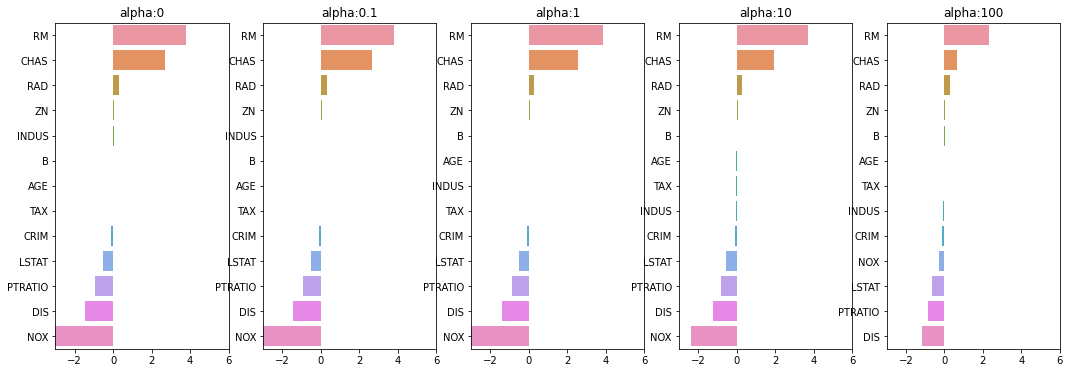

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 matplotlib 축 생성
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
# 각 alpha에따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
  ridge=Ridge(alpha=alpha)
  ridge.fit(X_data, y_target)
  # alpha에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 DataFrame 칼럼으로 추가
  coeff= pd.Series(data=ridge.coef_, index=X_data.columns)
  colname = 'alpha:'+str(alpha)
  coeff_df[colname]=coeff
  # 막대 그래프로 각 alpha값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
  coeff = coeff.sort_values(ascending=False)
  axs[pos].set_title(colname)
  axs[pos].set_xlim(-3,6)
  sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

# for 문 바깥에서 matplotlib의 show 호출 및 alpha에 따른 회귀별 회귀 계수를 DataFrame으로 표시
plt.show()

# alpha값을 계속 증가시킬수록 회귀 계수 값은 지속적으로 작아짐. 

In [32]:
ridge_alphas=[0,0.1,1,10,100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

# alpha 값이 증가하면서 회귀 계수가 지속적으로 작아짐. 

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


### 라쏘 회귀

- W의 절댓값에 페널티를 부여하는 L1 규제를 선형 회귀에 적용한 것

- 라쏘 회귀 비용함수의 목표는 RSS(W) + alpha*llWll1 식을 최소화하는 W를 찾는 것

- L1 규제: 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거 -> 적절한 피처만 회귀에 포함시키는 피처 선택 기능

- Lasso 클래스의 주요 생성 파라미터는 alpha (L1 규제 계수)

In [33]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha 값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params = None, X_data_n  = None, y_target_n = None, verbose = True) :
  coeff_df = pd.DataFrame()
  if verbose : print('#####', model_name, '#####')

  for param in params :
    if model_name == 'Ridge' : model = Ridge(alpha = param)
    elif model_name == 'Lasso' : model = Lasso(alpha = param)
    elif model_name == 'ElasticNet' : model = ElasticNet(alpha = param, l1_ratio = 0.7)
    
    neg_mse_scores = cross_val_score(model,X_data_n,y_target_n, scoring= 'neg_mean_squared_error',cv = 5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {0}일 때는 5 폴드 세트의 평균 RMSE: {1:.3f}'.format(param,avg_rmse))
    # cross_val_score는 evaluation matric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
    model.fit(X_data, y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
    coeff = pd.Series(data=model.coef_, index=X_data.columns)
    colname = 'alpha:' + str(param)
    coeff_df[colname] = coeff
  return coeff_df
# end of get linear_regre_eval

In [34]:
# 라쏘에 사용될 alpha 파라미터의 값을 정의하고 get_linear_reg_eval 함수 추출
lasso_alphas = [0.07,0.1,0.5,1,3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n= X_data, y_target_n=y_target)

##### Lasso #####
alpha 0.07일 때는 5 폴드 세트의 평균 RMSE: 5.612
alpha 0.1일 때는 5 폴드 세트의 평균 RMSE: 5.615
alpha 0.5일 때는 5 폴드 세트의 평균 RMSE: 5.669
alpha 1일 때는 5 폴드 세트의 평균 RMSE: 5.776
alpha 3일 때는 5 폴드 세트의 평균 RMSE: 6.189


In [35]:
# 반환된 coeff_lasso_df를 첫 번째 칼럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column = 'alpha:' + str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

# alpha의 크기가 증가함에 따라 일부 피처의 회귀 계수는 아예 0으로 바뀜. -> 피처 선택의 효과

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


### 엘라스틱넷 회귀

- L2 규제와 L1 규제를 결합한 회귀

- 엘라스틱넷 회귀 비용함수의 목표는 RSS(W) + alpha2*llWll2_2 + alpha1*llWll1 식을 최소화하는 W를 찾는 것

- 라쏘 회귀는 서로 상관관계가 높은 피처들의 경우에 이들 중에서 중요 피처만을 셀렉션하고 다른 피처들은 모두 회귀 계수를 0으로 만드는 성향이 강하여 alpha값에 따라 회귀 계수의 값이 급격힌 변동할 수 있어 이를 완화하기 위해 L2 규제를 추가

- 수행시간이 상대적으로 오래 걸림.

- 엘라스틱넷의 규제는 a * L1 + b * L2 (a는 L1규제의 alpha, b는 L2규제의 alpha)

In [36]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio=0.7로 고정
elastic_alphas = [0.07,0.1,0.5,1,3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X_data, y_target_n= y_target)

##### ElasticNet #####
alpha 0.07일 때는 5 폴드 세트의 평균 RMSE: 5.542
alpha 0.1일 때는 5 폴드 세트의 평균 RMSE: 5.526
alpha 0.5일 때는 5 폴드 세트의 평균 RMSE: 5.467
alpha 1일 때는 5 폴드 세트의 평균 RMSE: 5.597
alpha 3일 때는 5 폴드 세트의 평균 RMSE: 6.068


In [37]:
# 반환된 coeff_elastic_df를 첫 번째 칼럼 순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column='alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

# alpha값에 따른 피처들의 회귀 계수들 값이 라쏘보다는 상대적으로 0이 되는 값이 적음.

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


### 선형 회귀 모델을 위한 데이터 변환

선형 회귀 모델을 적용하기 전에 먼저 데이터에 대한 스케일링/정규화 작업을 수행하는 것이 일반적임.

1. StandardScaler 클래스를 이용해 평균이 0, 분산이 1인 표준정규분포를 가진 데이터 세트로 변환하거나 MinMaxScaler 클래스를 이용해 최솟값이 0이고 최댓값이 1인 값으로 정규화를 수행함.

2. 스케일링/정규화를 수행한 데이터 세트에 다시 다항 특성을 적용하여 변환하는 방법. 보통 1번 방법을 통해 예측 성능에 향상이 없을 경우 이와 같은 방법을 적용

3. 로그 변환(Log Transformation): 원래 값에 log 함수를 적용하면 보다 정규 분포에 가까운 형태로 값이 분포됨. 실제로 선형 회귀에서는 앞에서 소개한 1,2번 방법보다 로그 변환이 훨씬 많이 이용됨. 1번 방법의 경우 예측 성능 향상을 크게 기대하기 어려운 경우가 많으며 2번 방법의 경우 피처 개수가 매우 많을 경우에는 다항 변환으로 생성되는 피처의 개수가 기하급수로 늘어나서 과적합의 이슈가 발생할 수 있기 때문. 

In [38]:
# method는 표준 정규 분포 변환(Standard), 최댓값/최솟값 정규화(MinMax), 로그변환(Log) 결정
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# p_degree는 다항식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음.
def get_scaled_data(method='None', p_degree='None', input_data='None'):
  if method=='Standard': scaled_data=StandardScaler().fit_transform(input_data)
  elif method=='MinMax': scaled_data=MinMaxScaler().fit_transform(input_data)
  elif method=='Log': scaled_data = np.log1p(input_data) # np.log1p(): log()함수는 언더플로우가 발생하기 쉬워 1+log() 이용
  else: scaled_data=input_data

  if p_degree!=None:
    scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)
  return scaled_data

In [39]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RMSE 추출
alphas=[0.1,1,10,100]

# 5개 방식으로 변환. 먼저 원본 그대로, 표준정규 분포, 표준정규분포 + 다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환
scale_methods=[(None, None), ('Standard', None), ('Standard',2), ('MinMax',None), ('MinMax',2), ('Log',None)]

for scale_method in scale_methods:
  X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], input_data=X_data)
  print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
  get_linear_reg_eval('Ridge',params = alphas, X_data_n = X_data_scaled, y_target_n = y_target, verbose = False)


## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때는 5 폴드 세트의 평균 RMSE: 5.788
alpha 1일 때는 5 폴드 세트의 평균 RMSE: 5.653
alpha 10일 때는 5 폴드 세트의 평균 RMSE: 5.518
alpha 100일 때는 5 폴드 세트의 평균 RMSE: 5.330

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때는 5 폴드 세트의 평균 RMSE: 5.826
alpha 1일 때는 5 폴드 세트의 평균 RMSE: 5.803
alpha 10일 때는 5 폴드 세트의 평균 RMSE: 5.637
alpha 100일 때는 5 폴드 세트의 평균 RMSE: 5.421

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때는 5 폴드 세트의 평균 RMSE: 8.827
alpha 1일 때는 5 폴드 세트의 평균 RMSE: 6.871
alpha 10일 때는 5 폴드 세트의 평균 RMSE: 5.485
alpha 100일 때는 5 폴드 세트의 평균 RMSE: 4.634

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때는 5 폴드 세트의 평균 RMSE: 5.764
alpha 1일 때는 5 폴드 세트의 평균 RMSE: 5.465
alpha 10일 때는 5 폴드 세트의 평균 RMSE: 5.754
alpha 100일 때는 5 폴드 세트의 평균 RMSE: 7.635

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때는 5 폴드 세트의 평균 RMSE: 5.298
alpha 1일 때는 5 폴드 세트의 평균 RMSE: 4.323
alpha 10일 때는 5 폴드 세트의 평균 RMSE: 5.185
alpha 100일 때는 5 폴드 세트의 평균 RMSE: 6.538

## 변환 유형:Log, Polynomial Degree:None
alpha 0.1일 때는 5 

## 07 로지스틱 회귀

- 선형 회귀 방식을 분류에 적용한 알고리즘

- 시그모이드 함수 최적선을 찾고 이 시그모이드 함수(y = 1/(1+e^(-x))) 의 반환 값을 확률로 간주해 확률에 따라 분류를 결정 (x값이 커지면 1에 근사, x값이 작아지면 0에 근사)

- 이진 분류 예측 성능에 뛰어남.

- 희소한 데이터 세트 분류에도 뛰어난 성능을 보여 텍스트 분류에서도 자주 사용됨.

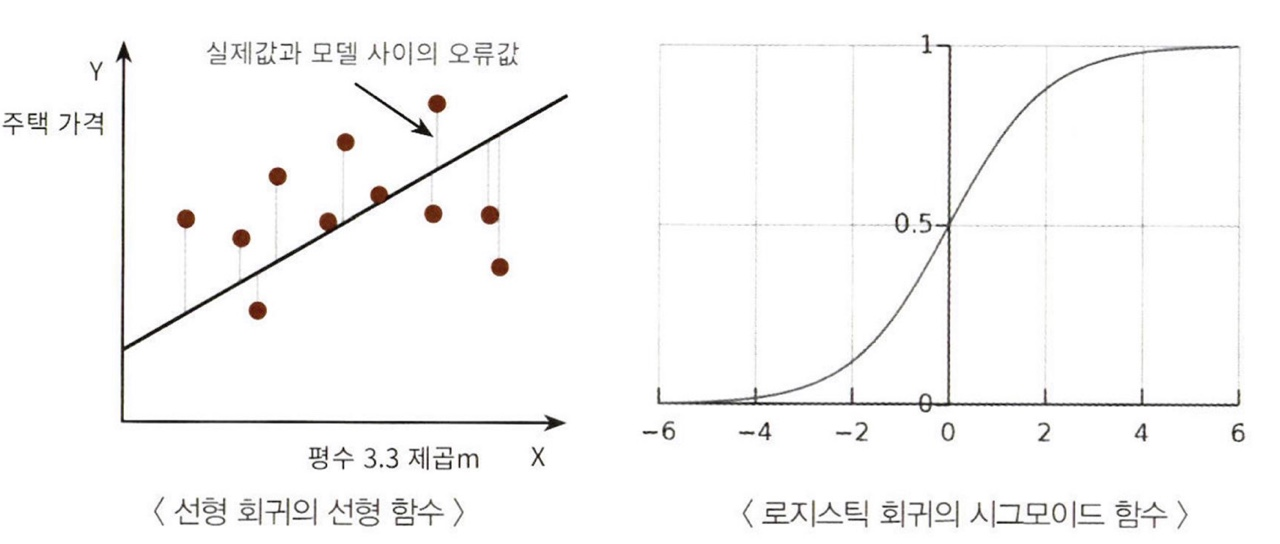

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

# 로지스틱 회귀는 데이터의 정규 분포도에 따라 예측 성능 영향을 받을 수 있으므로 데이터에 먼저 정규 분포 형태의 표준 스케일링을 적용한 뒤 데이터 세트 분리

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler()로 평균이 0, 분산이 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용해 학습 및 예측 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# 정확도와 roc_auc 측정
print('accuracy: {0:.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc: {0:3f}'.format(roc_auc_score(y_test, lr_preds)))

accuracy: 0.977
roc_auc: 0.971561


### LogisticRegression 클래스의 주요 하이퍼 파라미터

- penalty: 'l2' (L2 규제, default), 'l1'(L1 규제)

- C = 1/alpha(규제 강도) : C값이 작을수록 규제강도가 큼.

In [43]:
from sklearn.model_selection import GridSearchCV

params = {'penalty':['l2','l1'], 'C':[0.01,0.1,1,1,5,10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 하이퍼 파라미터:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 1, 'penalty': 'l2'}, 최적 평균 하이퍼 파라미터:0.975


## 08 회귀 트리

- 분류 트리는 특정 클래스 레이블을 결정하는 것과 달리, 회귀 트리는 리프 노드에 속한 데이터 값의 평균값을 구해 회귀 예측값을 계산

- CART(Classification And Regression Trees): 분류와 회귀를 가능하게 해주는 트리 생성 알고리즘

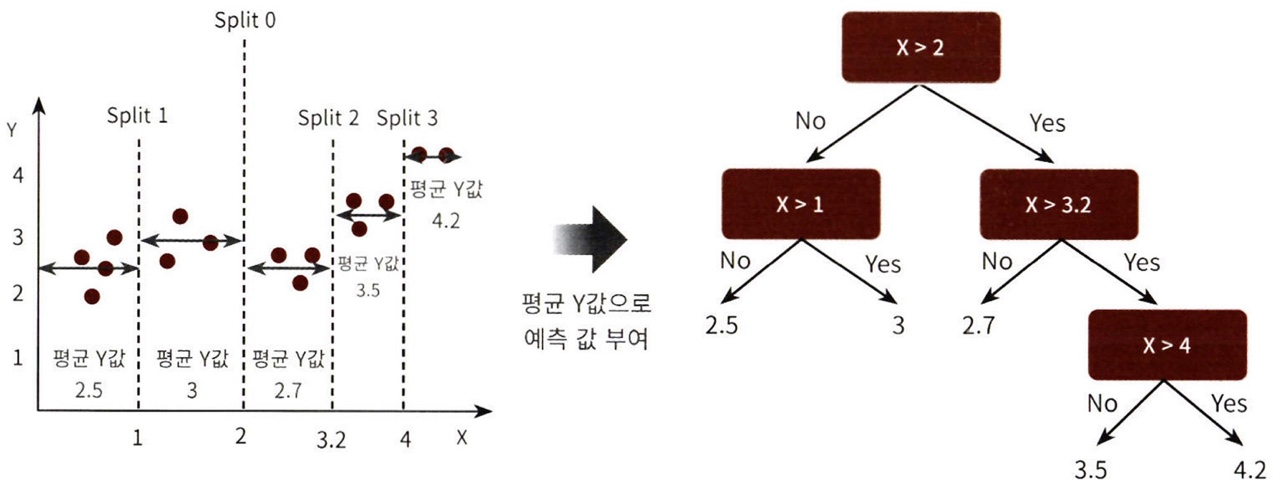

In [44]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# 보스턴 데이터 세트 로드
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 교차 검증의 개별 Negative MSE scores:',np.round(neg_mse_scores,2))
print('5 교차 검증의 개별 RMSE scores:',np.round(rmse_scores,2))
print('5 교차 검증의 평균 RMSE: {0:.3f}'.format(avg_rmse))

5 교차 검증의 개별 Negative MSE scores: [ -7.88 -13.14 -20.57 -46.23 -18.88]
5 교차 검증의 개별 RMSE scores: [2.81 3.63 4.54 6.8  4.34]
5 교차 검증의 평균 RMSE: 4.423


In [45]:
# 입력 모델과 데이터 세트를 입력 받아 교차 검증으로 평균 RMSE를 계산해주는 함수 생성

def get_model_cv_prediction(model, X_data, y_target):
  neg_mse_scores = cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
  rmse_scores = np.sqrt(-1*neg_mse_scores)
  avg_rmse = np.mean(rmse_scores)
  print('#####', model.__class__.__name__,'####')
  print('5 교차 검증의 평균 RMSE: {0:.3f}'.format(avg_rmse))

In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0,n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
  get_model_cv_prediction(model, X_data, y_target)

##### DecisionTreeRegressor ####
5 교차 검증의 평균 RMSE: 5.978
##### RandomForestRegressor ####
5 교차 검증의 평균 RMSE: 4.423
##### GradientBoostingRegressor ####
5 교차 검증의 평균 RMSE: 4.269
[01:37:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:37:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:37:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:37:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:37:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
##### XGBRegressor ####
5 교차 검증의 평균 RMSE: 4.089
##### LGBMRegressor ####
5 교차 검증의 평균 RMSE: 4.646


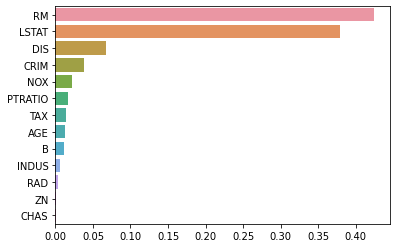

In [50]:
# Regressor 클래스는 선형 회귀와 다른 처리 방식이므로 coef_속성이 없음. -> feature_importances_로 피처별 중요도 확인

import seaborn as sns

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 세트를 적용해 학습
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

(100, 2)


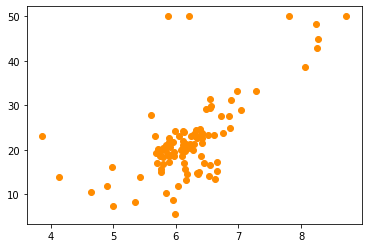

In [51]:
bostonDF_sample = bostonDF[['RM','PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100,random_state=0)
print(bostonDF_sample.shape)

plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')

In [54]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 2,7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 세트를 4.5~8.5까지의 100개 데이터 세트로 생성
X_test = np.arange(4.5,8.5,0.04).reshape(-1,1)

# 보스턴 주택 가격 데이터에서 시각화를 위한 피처는 RM만, 그리고 결정 데이터인 PRICE 추출
X_feature = bostonDF_sample['RM'].values.reshape(-1,1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1,1)

# 학습과 예측 수행
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

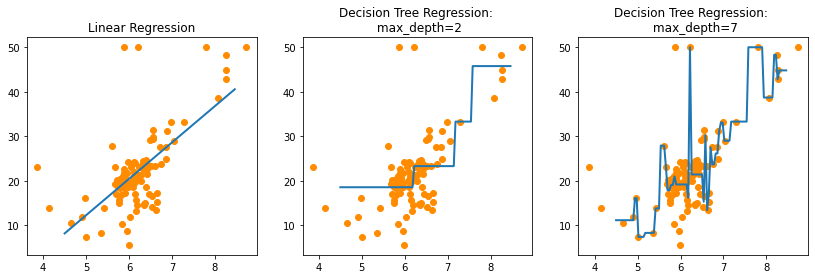

In [55]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

# X축 값을 4.5~8.5로 변환하며 입력했을 때 선형 회귀와 결정 트리 회귀 예측선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax1.plot(X_test, pred_lr, label='linear', linewidth=2)

# DecisionTreeRegressor의 max_depth를 2로 했을 떄 회귀 예측선
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax2.plot(X_test, pred_rf2, label='max_depth:3', linewidth=2)

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax3.plot(X_test, pred_rf7, label='max_depth:7', linewidth=2)

# 선형 회귀는 직선으로 예측 회귀선을 표현하지만, 회귀 트리의 경우 분할되는 데이터 지점에 따라 브랜티를 만들면서 계단 형태로 회귀선을 만듬. 
# max_depth=7인 경우 학습 데이터 세트의 이상치(outliner) 데이터도 학습하면서 복잡한 계단 형태의 회귀선을 만들어 과적합이 되기 쉬운 모델이 됨.